Index(['No-Step', 'txt_name', 'txt_name.1', 'HR', 'rMSSD', 'pNN50', 'SDNN',
       'HF', 'LF', 'LF/HF',
       ...
       'HF_end', 'HF_difference', 'LF_start', 'LF_end', 'LF_difference',
       'LF/HF_start', 'LF/HF_end', 'LF/HF_difference', 'use', 'Step-new'],
      dtype='object', length=433)


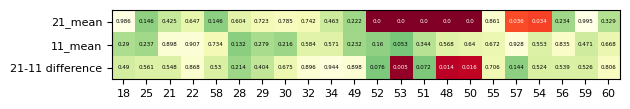

In [2]:
#Commonly Used Packages
import sys
sys.path.insert(0, sys.path[0]+"/../")
from researchtoolbox.utility import preprocessing as prs
from researchtoolbox.visualization import chart as vis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
import statsmodels.formula.api as smf


# plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文字体
plt.rcParams['axes.unicode_minus'] = False    # 显示负号
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

index_list = [18, 25, 21, 22, 58, 28, 29, 30, 32, 34, 49, 52, 53, 51, 48, 50, 55, 57, 54, 56, 59, 60]

step = True
plot = True
save = False
excel_path = "../../resources/data/combined/Data_All_final_1231.xlsx"
group_1 = 21
group_2 = 11


if step:
    output_path = "Thermal_ml_step{}_{}_1231.xlsx".format(group_1, group_2)
else:
    output_path = "Thermal_ml_step_all_1231.xlsx"

if step:
    df = pd.read_excel(excel_path, sheet_name="step{}_{}".format(group_1, group_2))  # 画图时使用
else:
    df = pd.read_excel(excel_path, sheet_name="1.Combined-120")
df = prs.Match(df).compute_ratio()
if save:
    df.to_excel(output_path, index=False)

if plot:
    df_seq0 = df[df["Seq"] == 0]
    print(df_seq0.columns)
    heat_map = vis.HeatPlot(df_seq0, group_1, group_2)
    heat_map.single_ROI_thermal()
    # df_new = heat_map.draw_heatmap()

